In [1]:
import pandas as pd
from sklearn.metrics import silhouette_score

In [2]:
source_df = pd.read_csv("../csvs/Iris.csv")
source_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
source_df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [4]:
df = source_df.drop(['Species'], axis=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
X = df.values[:,1:]
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)

In [6]:
from sklearn.cluster import KMeans
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [7]:
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.4589717867018717

In [8]:
df["Clus_km"] = labels
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clus_km
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


Text(0, 0.5, 'x2')

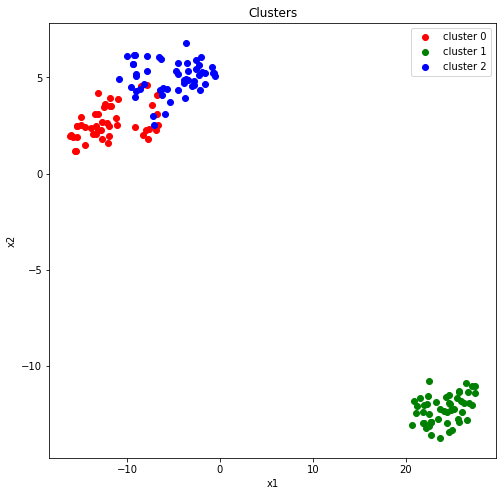

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

n_clusters = 3
colors = ['red', 'green', 'blue']
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(8,8))

Xtsne = TSNE(n_components=2).fit_transform(df.iloc[:,1:-1])
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = df['Clus_km']
dftsne.columns = ['x1','x2','cluster']

for color, label in zip(colors, cluster_labels):
    subset = dftsne[dftsne.cluster == label]
    plt.scatter(subset.x1, subset.x2, c=color, label='cluster '+str(label))

plt.legend()
plt.title('Clusters')
plt.xlabel('x1')
plt.ylabel('x2')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'SepalWidthCm')

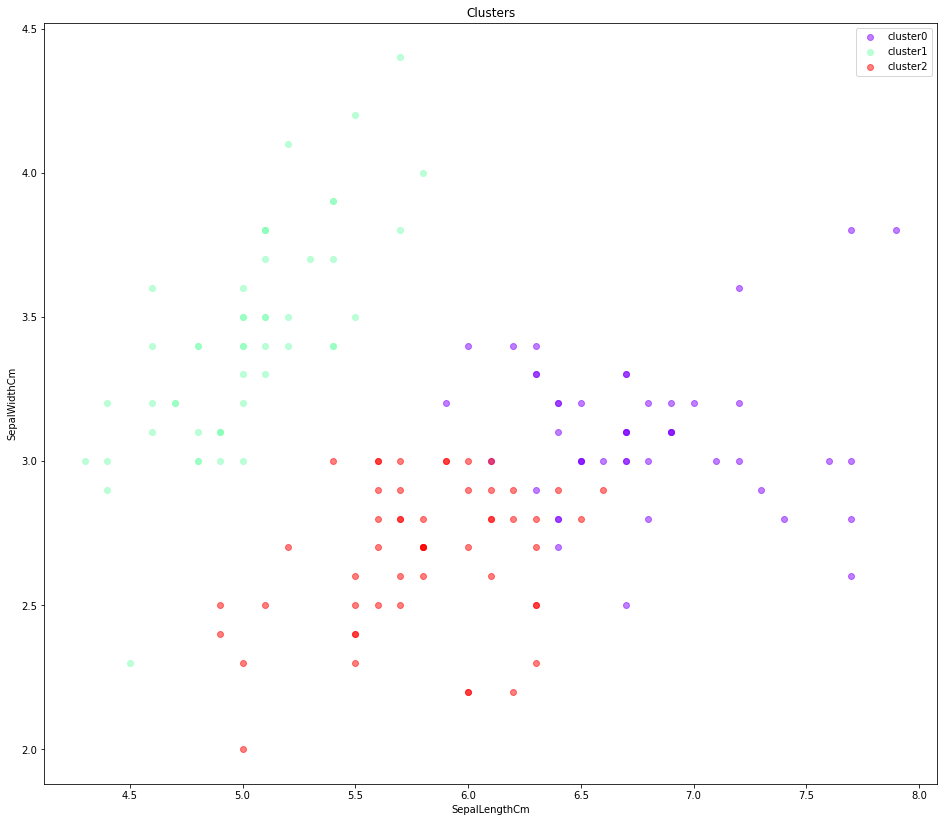

In [10]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

n_clusters = max(labels)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.Clus_km == label]
    plt.scatter(subset.SepalLengthCm, subset.SepalWidthCm, c=color, label='cluster'+str(label),alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

<AxesSubplot:>

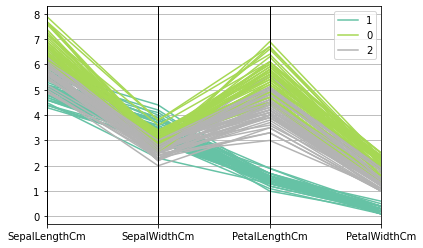

In [11]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df.drop('Id', axis=1), 'Clus_km', colormap=plt.get_cmap("Set2"))

In [12]:
cluster_list = [i for i in range (2, 11)]
scores = []

for i in range(2, 11):
    k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    k_means.fit(X)
    labels = k_means.labels_
    silhouette_avg = silhouette_score(X, labels)
    scores.append(silhouette_avg)
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

silhoutte score for n_clusters = 2 is 0.580184463257396
silhoutte score for n_clusters = 3 is 0.4589717867018717
silhoutte score for n_clusters = 4 is 0.38686030299599405
silhoutte score for n_clusters = 5 is 0.34478573455929096
silhoutte score for n_clusters = 6 is 0.32993302727100454
silhoutte score for n_clusters = 7 is 0.3271004667927379
silhoutte score for n_clusters = 8 is 0.3247487988679819
silhoutte score for n_clusters = 9 is 0.339771063425054
silhoutte score for n_clusters = 10 is 0.3537829909109029


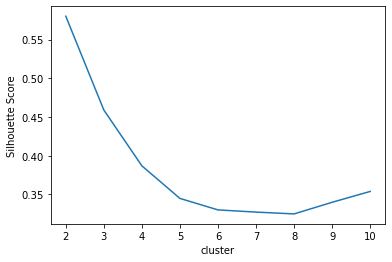

In [13]:
plt.plot(cluster_list, scores)
plt.xlabel('cluster')
plt.ylabel('Silhouette Score')
plt.show()